In [7]:
df = pd.read_csv('data.csv', encoding='latin1')



/tmp/ipython-input-3365458136.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='latin1')


In [8]:
df.columns
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


ar = 0.2
br = 1.2

Estimated Parameters:
mu = 25.805243726878015
lambda = 0.0014598199664885554
c = 0.021556324533226836


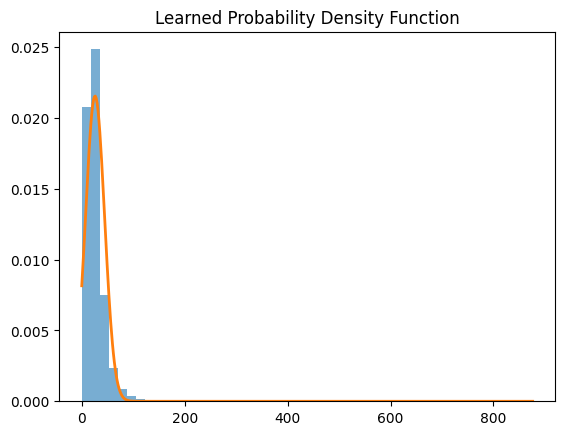

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load file
df = pd.read_csv('data.csv', encoding='latin1', low_memory=False)

# Extract NO2 column (lowercase!)
x = df['no2'].dropna().values

# Enter your roll number here
r = 123   # 🔴 CHANGE THIS to your roll number

# Compute ar and br
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("ar =", ar)
print("br =", br)

# Transform x to z
z = x + ar * np.sin(br * x)

# Estimate parameters using MLE
mu = np.mean(z)
sigma2 = np.var(z)

lambda_ = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)

print("\nEstimated Parameters:")
print("mu =", mu)
print("lambda =", lambda_)
print("c =", c)

# Plot histogram + learned PDF
z_range = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lambda_ * (z_range - mu)**2)

plt.hist(z, bins=50, density=True, alpha=0.6)
plt.plot(z_range, pdf, linewidth=2)
plt.title("Learned Probability Density Function")
plt.show()
